# APPLYING MACHINE LEARNING MODELS TO PREDICT BOX OFFICE REVENUE

#### SOUMYAROOP DAS___20070122138
#### SIDDHARTH INGLE___20070122131
#### SREEMAN REPAKA___20070122139
#### SIDDHANTH MUTHA___20070122130
#### SMRITI DWIVEDI___20070122133

#### The dataset being used is taken from Kaggle

## Overview of Project

##### Most of our analysis of the dataset is done on the basis of the 2 Objective measures, i.e., IMDb Score and Box Office Revenue
##### Other important analysis is also done for the dataset

## INDEX

##### 1.Loading in the required Libraries
##### 2.Loading in the the Dataset used in EDA
##### 3.Cleaning the Dataset for Linear Regression
##### 4.Plotting
##### 5.Creating a regression model
##### 6.Checking the results of model
##### 7.Applying the models for prediction

## 1.Loading in the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

## Loading in the Dataset used in EDA

In [2]:
rd=pd.read_csv("Final_movie_metadata.csv")

In [3]:
rd.columns

Index(['Unnamed: 0', 'index', 'director_name', 'num_critic_for_reviews',
       'duration', 'actor_2_name', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'actor_3_name',
       'num_user_for_reviews', 'language', 'country', 'budget', 'title_year',
       'imdb_score'],
      dtype='object')

In [4]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4792 entries, 0 to 4791
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4792 non-null   int64  
 1   index                   4792 non-null   int64  
 2   director_name           4792 non-null   object 
 3   num_critic_for_reviews  4792 non-null   float64
 4   duration                4792 non-null   float64
 5   actor_2_name            4792 non-null   object 
 6   gross                   4792 non-null   float64
 7   genres                  4792 non-null   object 
 8   actor_1_name            4792 non-null   object 
 9   movie_title             4792 non-null   object 
 10  num_voted_users         4792 non-null   int64  
 11  actor_3_name            4792 non-null   object 
 12  num_user_for_reviews    4792 non-null   float64
 13  language                4792 non-null   object 
 14  country                 4792 non-null   

In [5]:
rd.dtypes

Unnamed: 0                  int64
index                       int64
director_name              object
num_critic_for_reviews    float64
duration                  float64
actor_2_name               object
gross                     float64
genres                     object
actor_1_name               object
movie_title                object
num_voted_users             int64
actor_3_name               object
num_user_for_reviews      float64
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

## Cleaning the Dataset for Machine Learning Model Fitting

In [6]:
unwanted=["director_name","language","country","actor_3_name","movie_title","genres","actor_1_name","actor_2_name","index"]
rd.drop(unwanted,inplace=True,axis=1)

In [7]:
rd.dtypes

Unnamed: 0                  int64
num_critic_for_reviews    float64
duration                  float64
gross                     float64
num_voted_users             int64
num_user_for_reviews      float64
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

In [8]:
rd.head()

,Unnamed: 0,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score
0,0,723.0,178.0,760505847.0,886204,3054.0,237000000.0,2009.0,7.9
1,1,302.0,169.0,309404152.0,471220,1238.0,300000000.0,2007.0,7.1
2,2,602.0,148.0,200074175.0,275868,994.0,245000000.0,2015.0,6.8
3,3,813.0,164.0,448130642.0,1144337,2701.0,250000000.0,2012.0,8.5
4,4,462.0,132.0,73058679.0,212204,738.0,263700000.0,2012.0,6.6


## Plotting

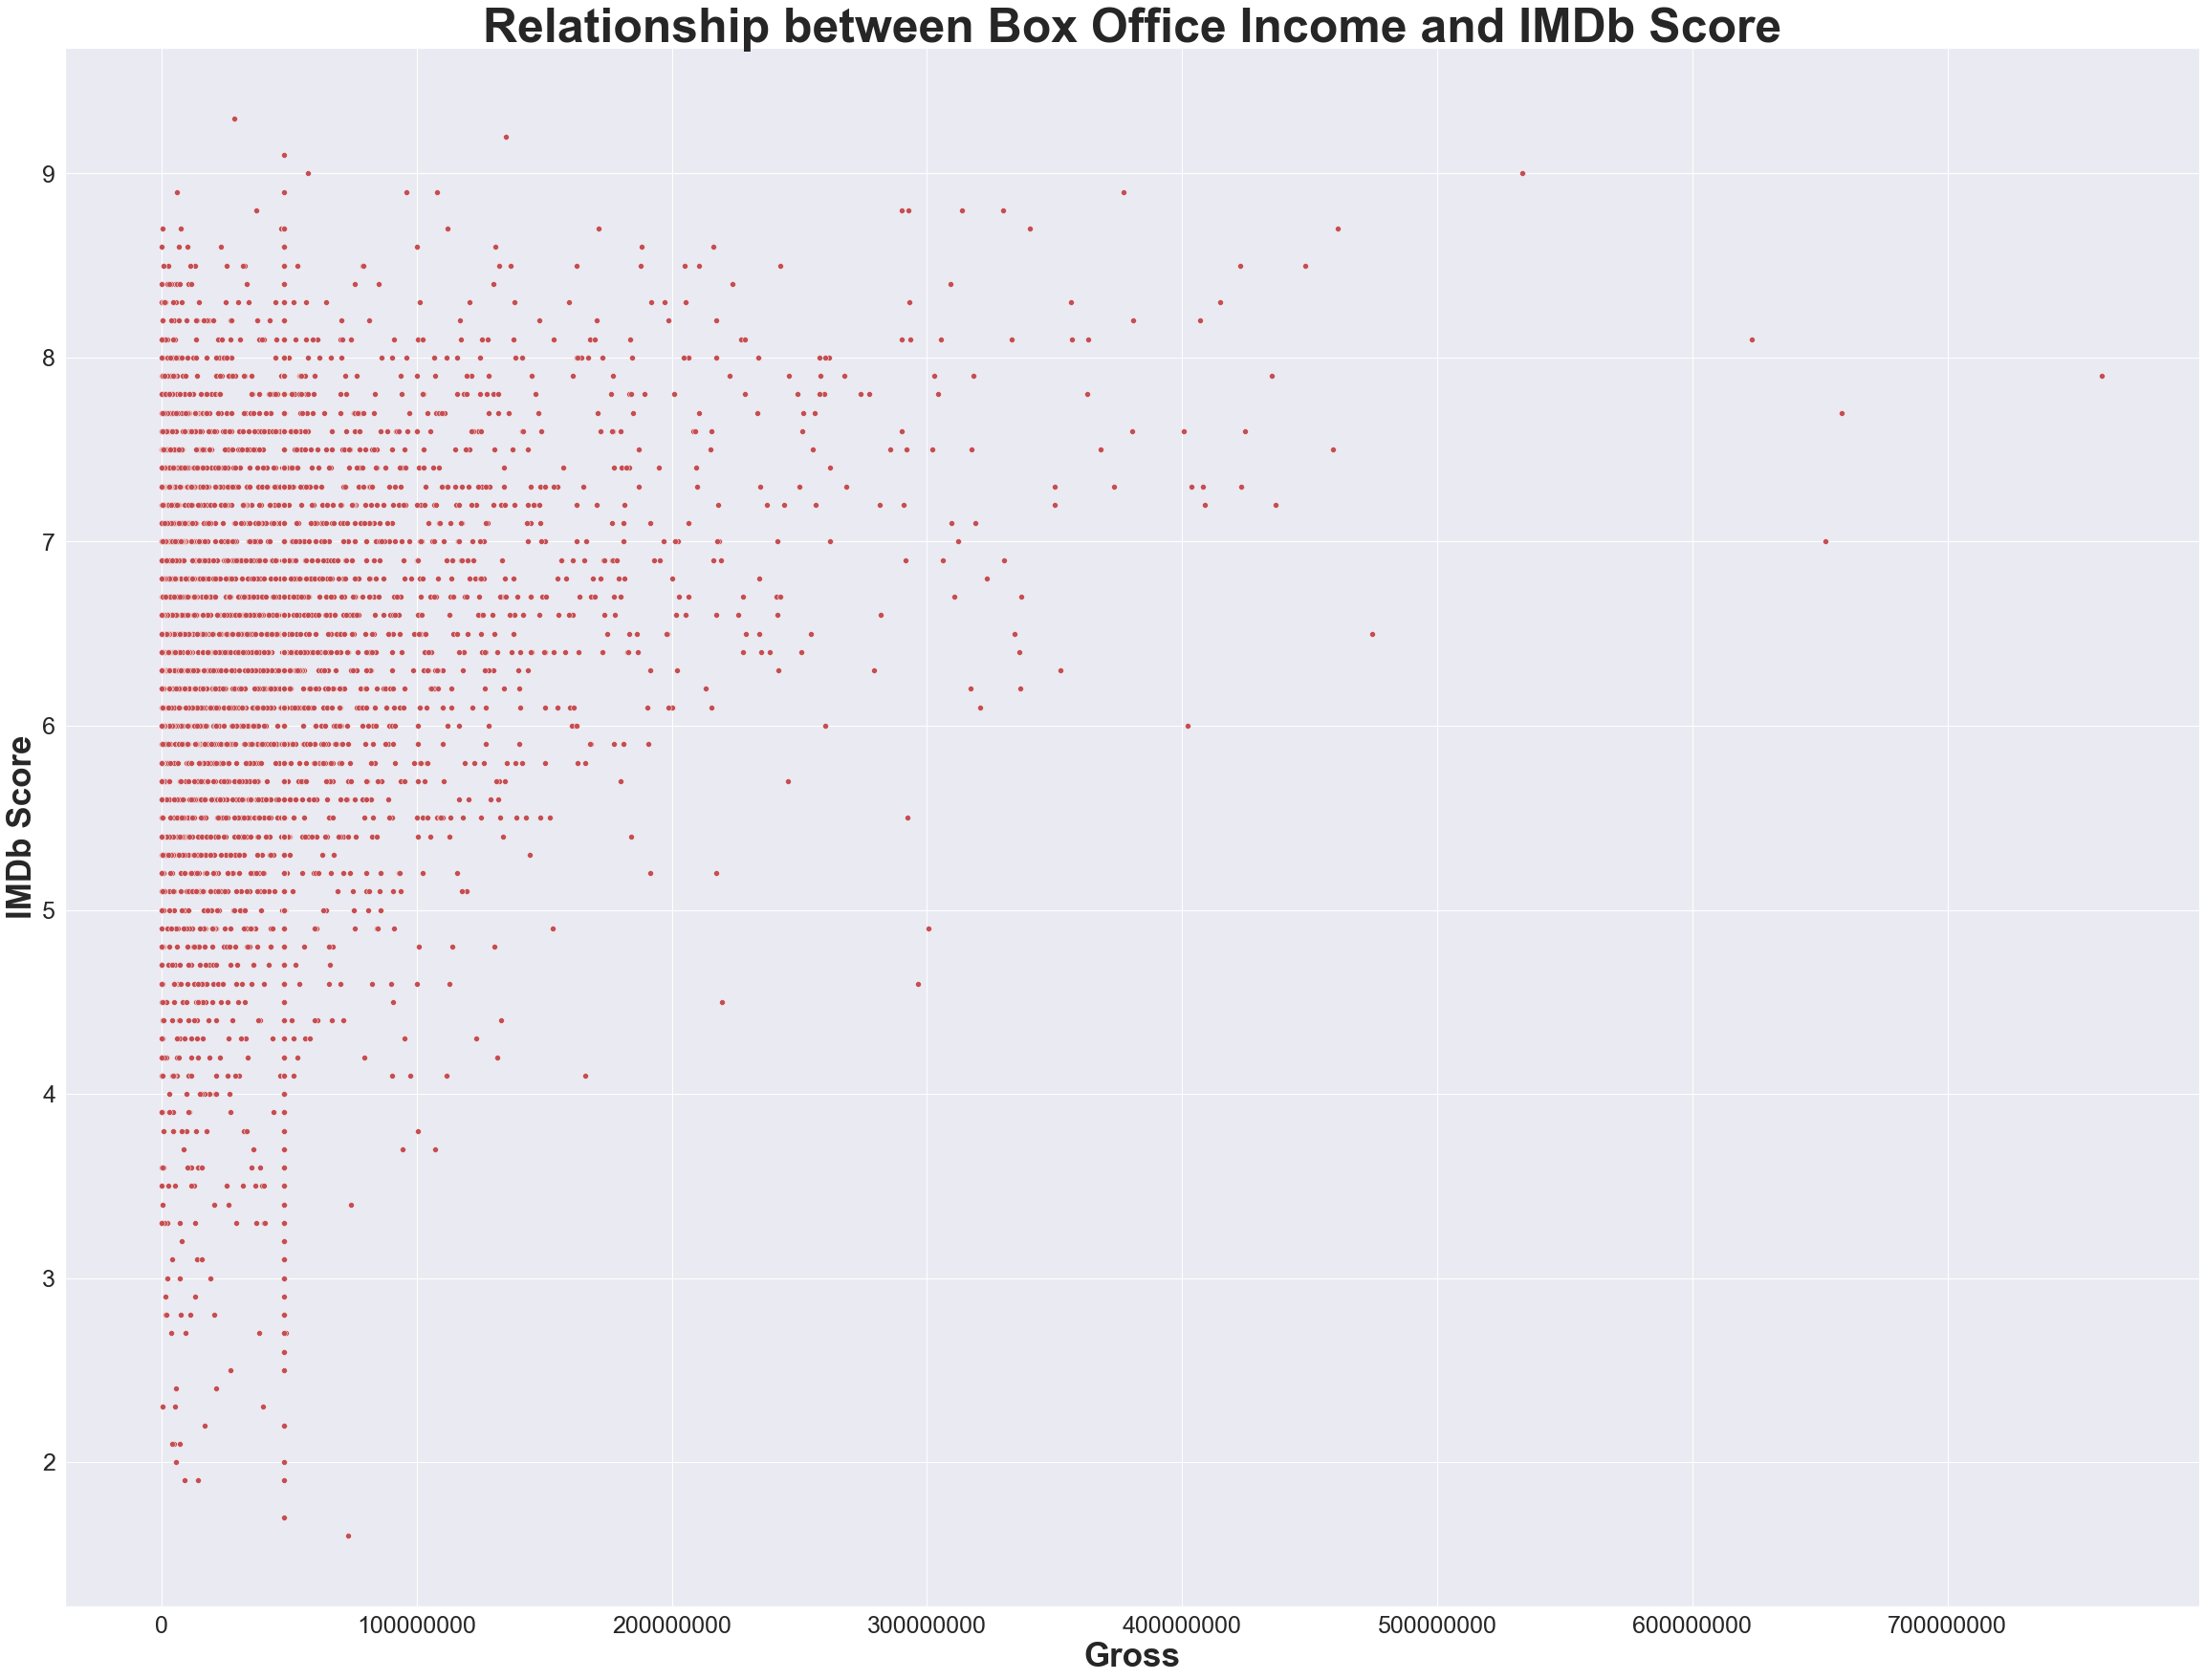

In [9]:
sns.set(rc={'figure.figsize':(40,30)})
sns.scatterplot(x="gross",y="imdb_score", data=rd, color='r')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.ylabel("IMDb Score",fontdict={'fontsize':35,'fontweight':'bold'})
plt.xlabel("Gross",fontdict={'fontsize':35,'fontweight':'bold'})


plt.title("Relationship between Box Office Income and IMDb Score", fontdict={'fontsize':50, 'fontweight':'bold'})

plt.savefig('Relationship between Box Office Income and IMDb Score.png')
plt.show()

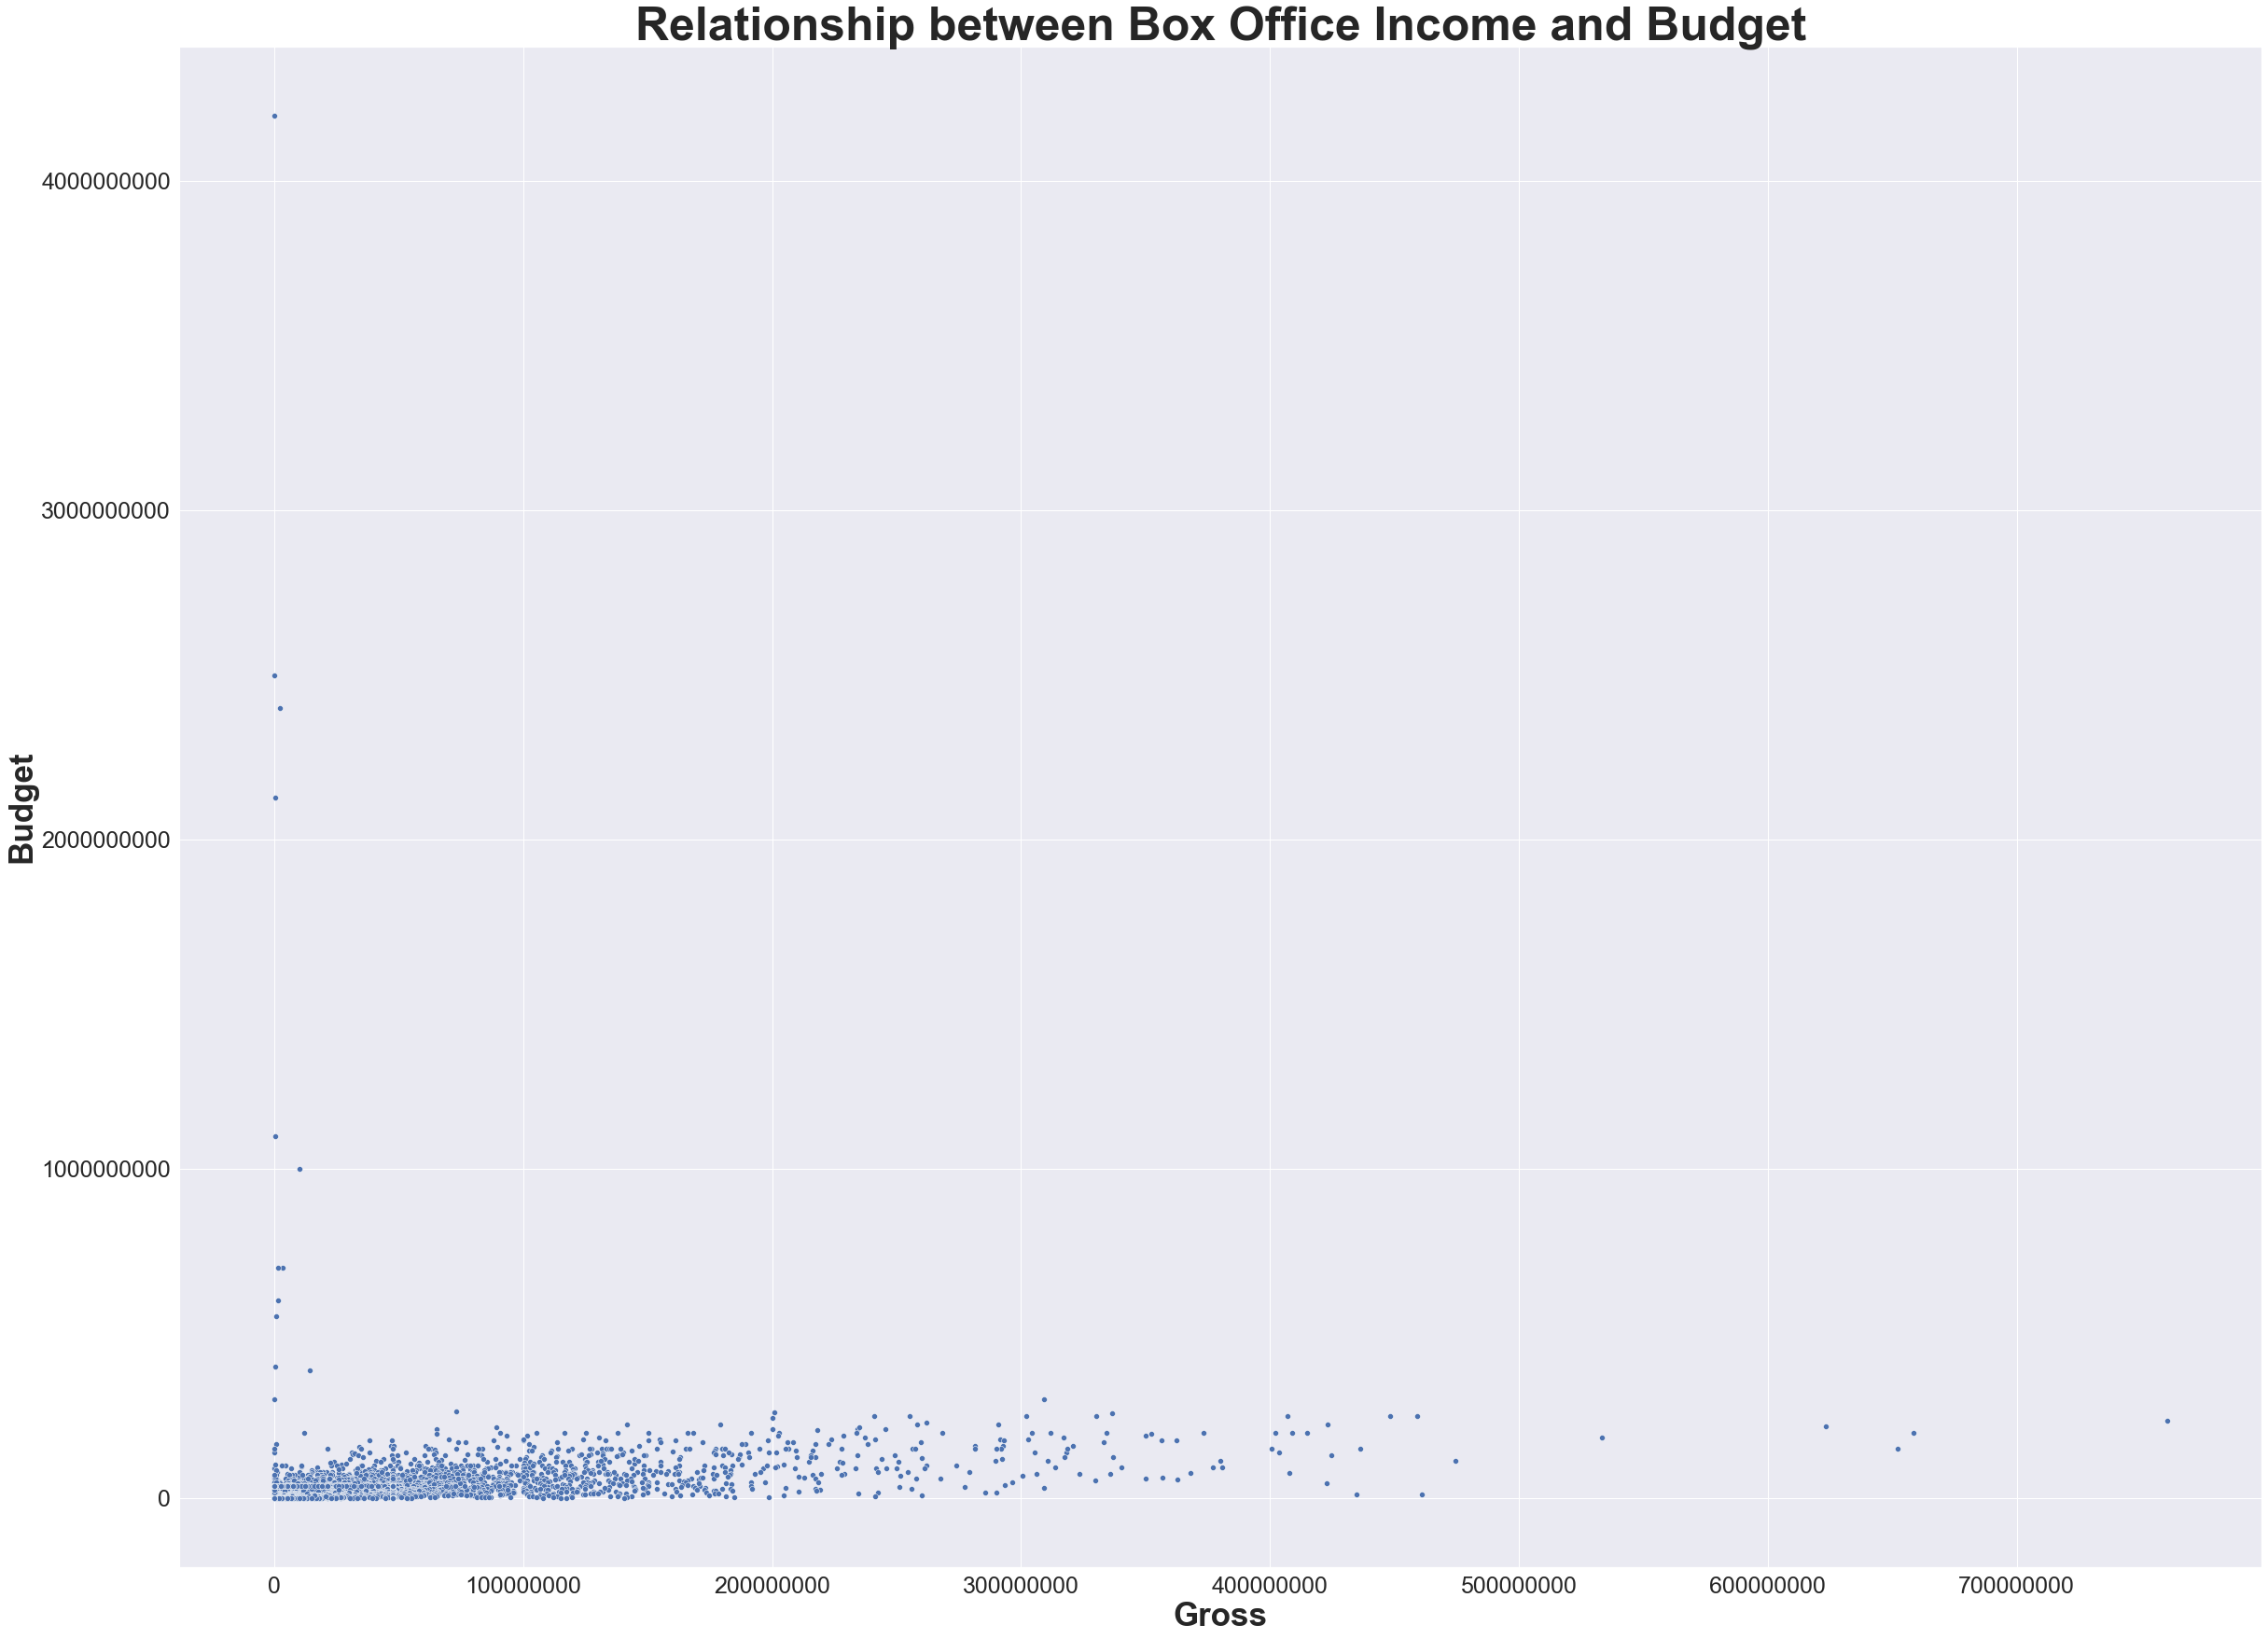

In [10]:
sns.scatterplot(x="gross",y="budget", data=rd, color='b')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.ylabel("Budget",fontdict={'fontsize':35,'fontweight':'bold'})
plt.xlabel("Gross",fontdict={'fontsize':35,'fontweight':'bold'})


plt.title("Relationship between Box Office Income and Budget", fontdict={'fontsize':50, 'fontweight':'bold'})

plt.savefig('Relationship between Box Office Income and Budget.png')
plt.show()

In [11]:
rd.columns

Index(['Unnamed: 0', 'num_critic_for_reviews', 'duration', 'gross',
       'num_voted_users', 'num_user_for_reviews', 'budget', 'title_year',
       'imdb_score'],
      dtype='object')

## Test and Train Split

In [12]:
#Test train split
X=rd.drop(columns=['gross'])
Y = pd.DataFrame().assign(gross=rd['gross'])
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, random_state=1)

In [13]:
Y.head()

,gross
0,760505847.0
1,309404152.0
2,200074175.0
3,448130642.0
4,73058679.0


In [14]:
X.head()

,Unnamed: 0,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score
0,0,723.0,178.0,886204,3054.0,237000000.0,2009.0,7.9
1,1,302.0,169.0,471220,1238.0,300000000.0,2007.0,7.1
2,2,602.0,148.0,275868,994.0,245000000.0,2015.0,6.8
3,3,813.0,164.0,1144337,2701.0,250000000.0,2012.0,8.5
4,4,462.0,132.0,212204,738.0,263700000.0,2012.0,6.6


In [15]:
X_train.shape

(3594, 8)

In [16]:
X_test.shape

(1198, 8)

In [17]:
X.shape

(4792, 8)

In [18]:
Y.shape

(4792, 1)

In [19]:
# plt.scatter(X_train[:,0], Y_train, label="Training Data", color='b')
# plt.scatter(X_test, Y_test, label="Testing Data", color='r')

## Linear Regression Model

In [20]:
#Making the linear regression model
lr_model = LinearRegression() 

#Trainin the model
lr_model.fit(X_train, Y_train)

#Testing/Predicting on the test data
lr_preds = lr_model.predict(X_test)

lin_score=lr_model.score(X_test,Y_test)

print("The Accuracy after using Linear Regression Model:",lin_score)


The Accuracy after using Linear Regression Model: 0.48722668098266186


In [21]:
prediction=lr_model.predict(X_test)

In [22]:
print(lr_model.coef_) #multiply with the predictor value.

[[-1.04133463e+04  1.21262567e+04 -9.11293203e+04  2.05993356e+02
   1.13142950e+04  6.23466138e-02 -2.71029861e+05 -3.59389104e+06]]


## Random Forest Regressor

In [23]:
rfr_model=RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
rfr_model.fit(X_train,Y_train)

y_hat = rfr_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, Y_test))

<ipython-input-23-30bca990ebc4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(X_train,Y_train)


R-Squared is: 0.42658753084421974
